In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
def load_img_with_text():
    blank_img = np.zeros((300, 500))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img, text="HELLO", org=(10,200), fontFace=font, fontScale=5, color=(255, 255, 255), thickness=20)
    return blank_img

In [19]:
def display_img(img):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

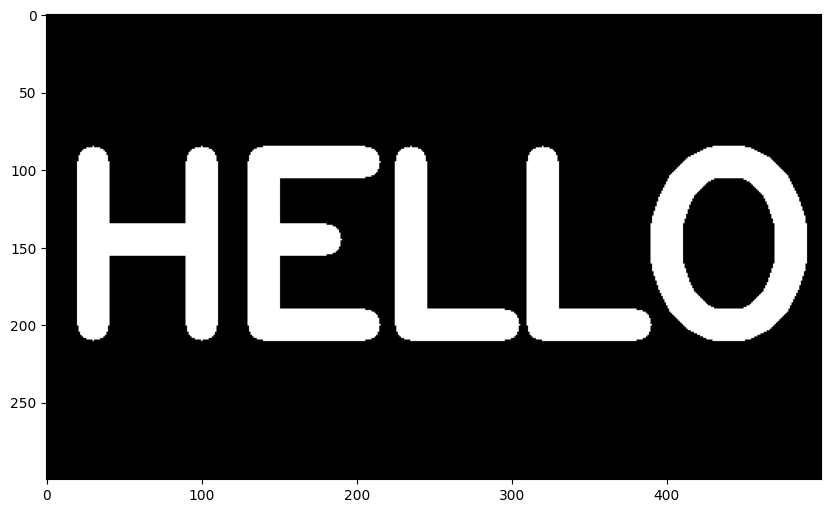

In [33]:
img = load_img_with_text()
display_img(img)

1. Morphological operator = Erosion

In [34]:
kernel = np.ones((5,5), dtype=np.uint8)
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

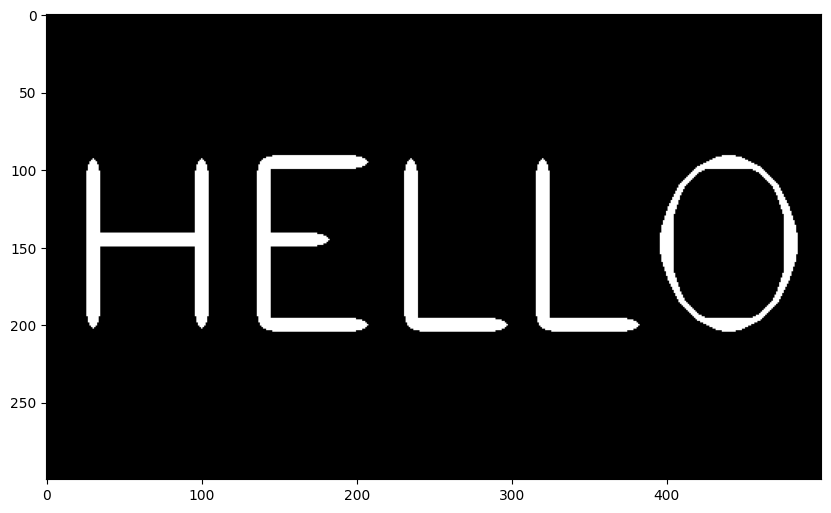

In [38]:
resErode = cv2.erode(img, kernel, iterations=3) #increase the iteration to get more erosion effect
display_img(resErode)

2. Morpological operators: Opening (or dilation)</br>
   For that, let us create an image with noise

In [41]:
img = load_img_with_text()
white_noise = np.random.randint(low=0, high=2, size=(300, 500))
white_noise

array([[1, 1, 0, ..., 0, 0, 1],
       [1, 1, 1, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0]])

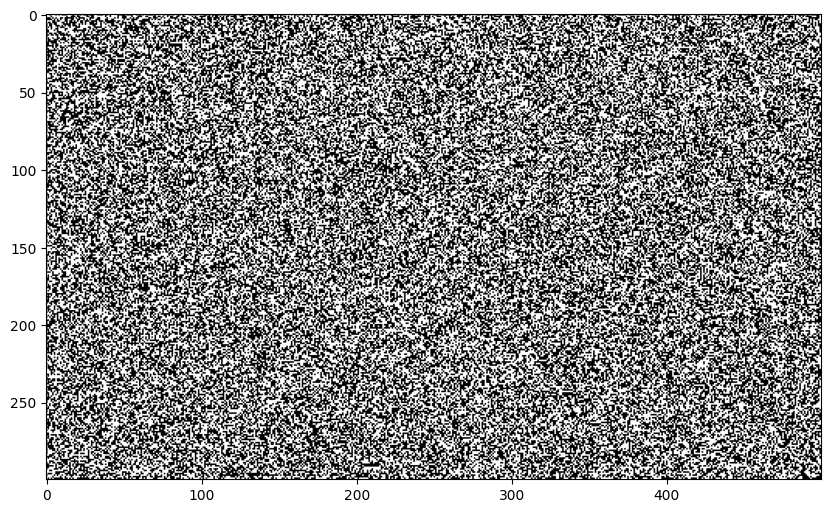

In [42]:
display_img(white_noise)

In [43]:
img.max()

255.0

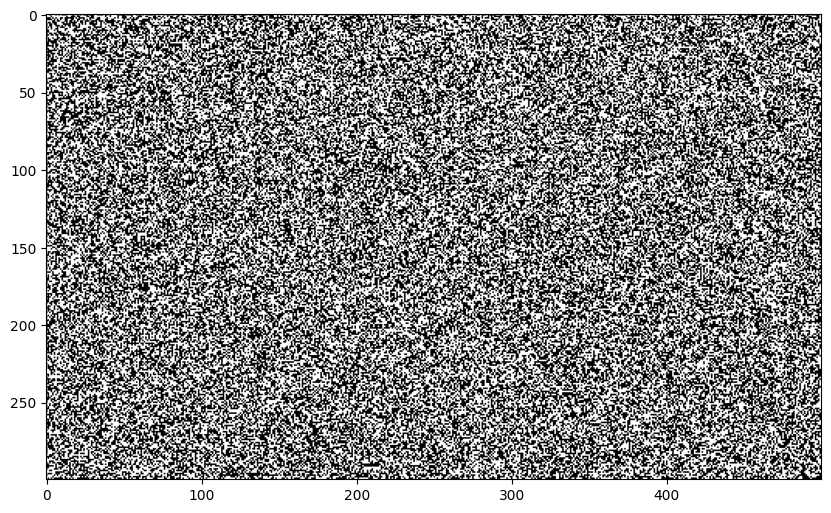

In [44]:
white_noise = white_noise * img.max()
display_img(white_noise)

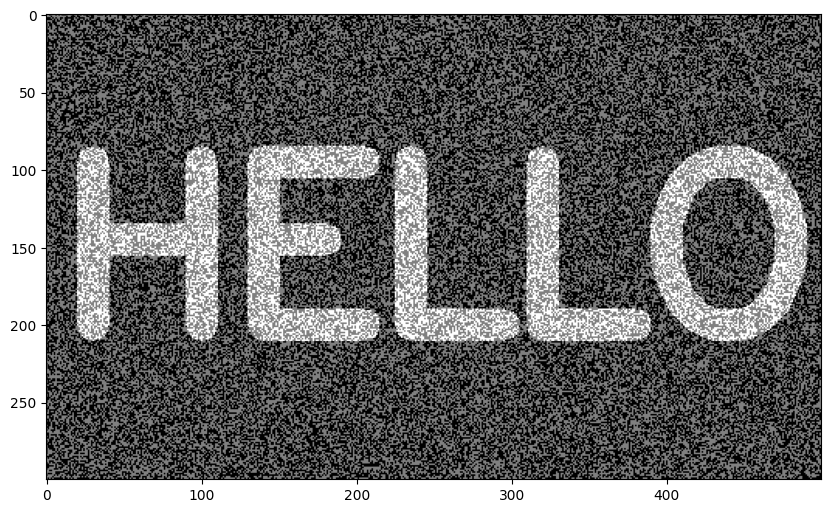

In [45]:
img_with_noise = white_noise + img # creating noise in the background
display_img(img_with_noise)

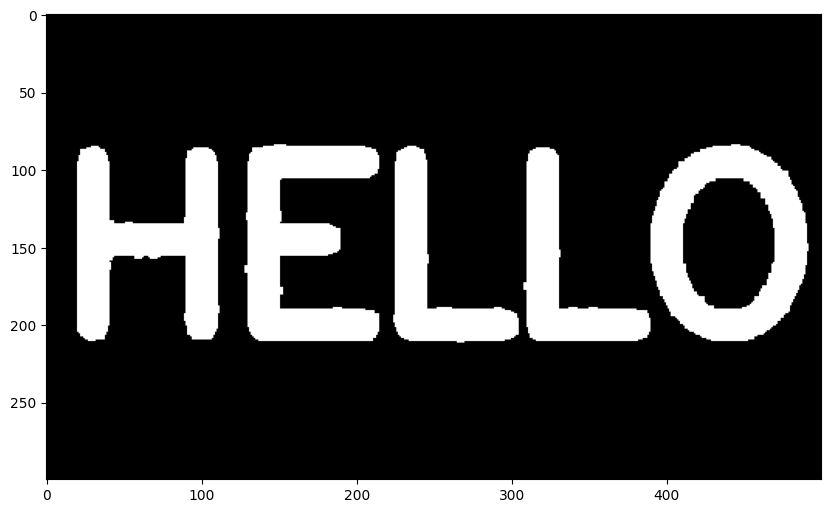

In [46]:
opening_img = cv2.morphologyEx(img_with_noise, cv2.MORPH_OPEN, kernel)
display_img(opening_img)

3. Closing technique - to remove Foreground noise

In [49]:
img = load_img_with_text()
black_noise = np.random.randint(low=0, high=2, size=(300, 500))
black_noise = black_noise * -img.max()
black_noise

array([[-255., -255., -255., ..., -255.,   -0.,   -0.],
       [-255., -255.,   -0., ..., -255., -255., -255.],
       [-255., -255., -255., ...,   -0.,   -0., -255.],
       ...,
       [-255., -255.,   -0., ...,   -0., -255., -255.],
       [  -0.,   -0., -255., ...,   -0.,   -0., -255.],
       [  -0.,   -0.,   -0., ...,   -0., -255.,   -0.]])

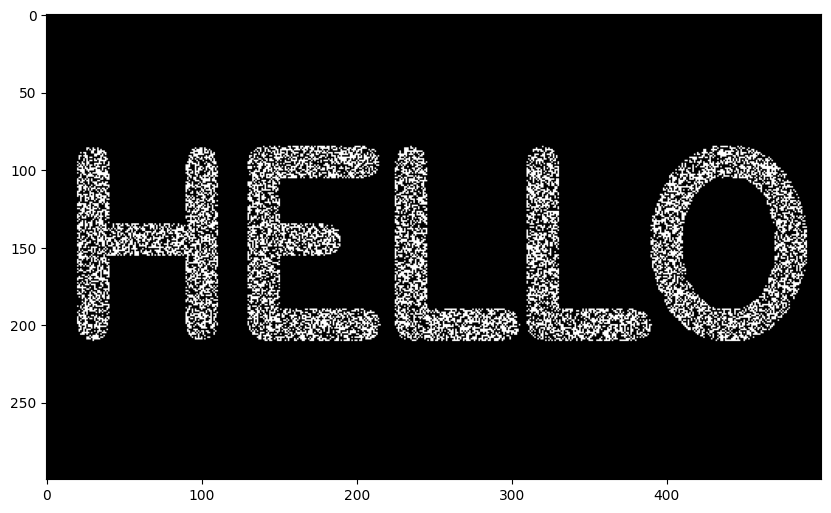

In [51]:
black_noise_img = img + black_noise
black_noise_img[black_noise_img == -255] = 0    # Creating noise in the foreground
display_img(black_noise_img)

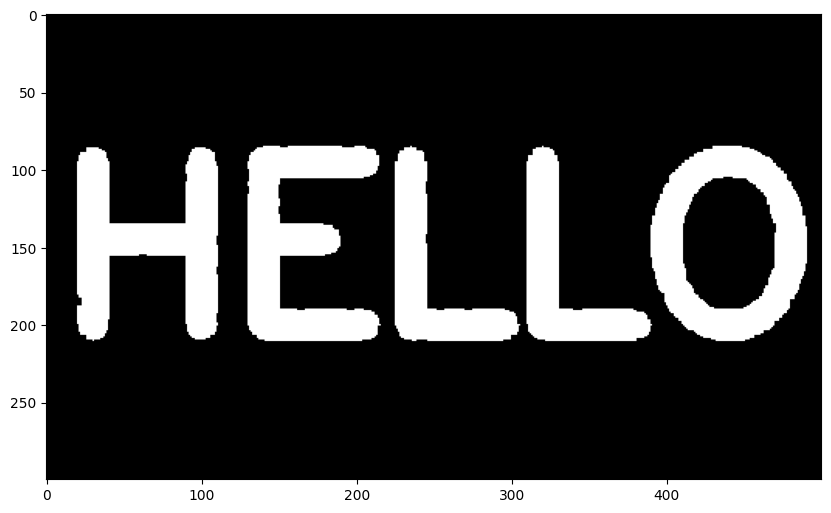

In [55]:
closing_img = cv2.morphologyEx(black_noise_img, cv2.MORPH_CLOSE, kernel)
display_img(closing_img)

4. Gradient technique (it is the difference b/w erosion and the dilation)

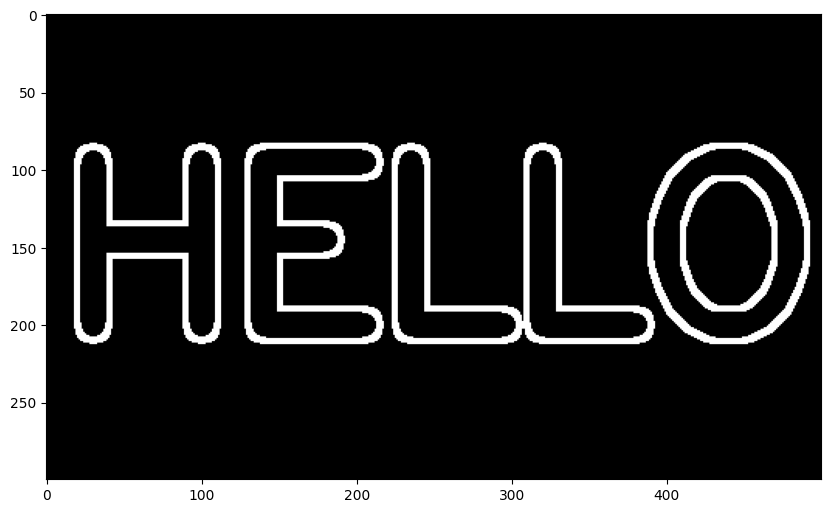

In [57]:
img = load_img_with_text()
gradient_img = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
display_img(gradient_img)